In [ ]:
!pip install geopy

In [281]:
import re
import time
import folium
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from geopy.geocoders import Nominatim
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import ElementClickInterceptedException

5성급 호텔

In [ ]:
df = pd.read_csv('./data/hotel_5star_agoda.csv')
df.head()

In [ ]:
df['review'] = None
df

In [ ]:
urls = df['hotel_url'].tolist()
len(urls)

In [ ]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [ ]:
reviews = []

for i in range(9,11):
    # 호텔 url 들어가기 
    driver.get(urls[i])
    time.sleep(5)
    
    # 언어 변경
    try:
        language_dropdown = Select(driver.find_element(By.CSS_SELECTOR, '#reviewFilterSection > div.sc-bdfBwQ.sc-gsTCUz.gdcQLK > div.sc-bdfBwQ.sc-gsTCUz.djZOQg > div > div > label > div.sc-bdfBwQ.sc-gsTCUz.bqqCNI > span > select'))
        # driver.find_element(By.XPATH, '//*[@id="reviewFilterSection"]/div[1]/div[3]/span/i[2]').click() #21번 전까지
        time.sleep(1)
    except ElementClickInterceptedException:
        continue
    
    # "한국어"를 선택
    try:
        language_dropdown.select_by_visible_text("한국어")
        # driver.find_element(By.XPATH, '//*[@id="reviews-language-filter_list"]/ul/li[2]').click() # 21번 전까지
        time.sleep(1)
    except ElementClickInterceptedException:
        continue
    
    while True:
        star_elements = driver.find_elements(By.CLASS_NAME, 'Review-comment-leftScore')
        review_elements = driver.find_elements(By.CLASS_NAME, 'Review-comment-bodyText')

        for star_element, review_element in zip(star_elements, review_elements):
            score = star_element.text
            review = review_element.text
            reviews.append([score, review])

        # 페이지 넘기기
        try:
            driver.find_element('xpath','//*[@id="reviewSection"]/div[4]/div/span[3]/i').click()
            time.sleep(1)
        except ElementClickInterceptedException:
            # 다음 페이지가 없으면 while 루프 종료
            break
        except NoSuchElementException:
            break
        
    df.at[i,'review'] = reviews
    reviews = []
    
    time.sleep(160)
    continue

In [ ]:
for i in range(len(urls)):
    review_column = df.iloc[i]['review']
    
    if review_column is not None:
        print(f'{i}번째 : ', len(review_column))
    else:
        print(f'{i}번째 : None.')

In [ ]:
df.to_csv('./data/hotel_5star_agoda_add.csv',index=False,encoding='utf-8')

=========================================


4성급 호텔


In [ ]:
df_4star = pd.read_csv('./data/hotel_4star_agoda.csv')
df_4star.head()

In [ ]:
df_4star['review'] = None
df_4star.tail()

In [ ]:
urls = df_4star['hotel_url'].tolist()
len(urls)

In [ ]:
reviews = []

a = 105
b = 105
l = len(urls)

for i in range(a,l):
    # 호텔 url 들어가기 
    driver.get(urls[i])
    time.sleep(5)
    
    # 언어 변경
    try:
        language_dropdown = Select(driver.find_element(By.CSS_SELECTOR, '#reviewFilterSection > div.sc-bdfBwQ.sc-gsTCUz.gdcQLK > div.sc-bdfBwQ.sc-gsTCUz.djZOQg > div > div > label > div.sc-bdfBwQ.sc-gsTCUz.bqqCNI > span > select'))
        # driver.find_element(By.XPATH, '//*[@id="reviewFilterSection"]/div[1]/div[3]/span').click() #21번 전까지
        time.sleep(1)
    except ElementClickInterceptedException:
        continue

    # "한국어"를 선택
    try:
        language_dropdown.select_by_visible_text("한국어")
        # driver.find_element(By.XPATH, '//*[@id="reviews-language-filter_list"]/ul/li[3]').click() # 21번 전까지
        time.sleep(1)
    except ElementClickInterceptedException:
        continue
    
    while True:
        star_elements = driver.find_elements(By.CLASS_NAME, 'Review-comment-leftScore')
        review_elements = driver.find_elements(By.CLASS_NAME, 'Review-comment-bodyText')

        for star_element, review_element in zip(star_elements, review_elements):
            score = star_element.text
            review = review_element.text
            reviews.append([score, review])

        # 페이지 넘기기
        try:
            driver.find_element('xpath','//*[@id="reviewSection"]/div[4]/div/span[3]/i').click()
            time.sleep(1)
        except ElementClickInterceptedException:
            # 다음 페이지가 없으면 while 루프 종료
            break
        except NoSuchElementException:
            break
        
    df_4star.at[i,'review'] = reviews
    reviews = []
    
    time.sleep(120)

In [ ]:
for i in range(len(urls)):
    review_column = df_4star.iloc[i]['review']
    
    if review_column is not None:
        print(f'{i}번째 : ', len(review_column))
    else:
        print(f'{i}번째 : None.')

In [ ]:
df_4star.to_csv('./data/hotel_4star_agoda_add.csv',index=False,encoding='utf-8')

=======================

3성급

In [ ]:
df_3star = pd.read_csv('./data/hotel_3star_agoda.csv')

In [ ]:
df_3star['review'] = None

In [ ]:
urls = df_3star['hotel_url'].tolist()

In [ ]:
reviews = []

a = 113
b = 60
l = len(urls)

for i in range(l-1,l):
    # 호텔 url 들어가기 
    driver.get(urls[i])
    time.sleep(5)
    
    
    # 언어 변경
    try:
        language_dropdown = Select(driver.find_element(By.CSS_SELECTOR, '#reviewFilterSection > div.sc-bdfBwQ.sc-gsTCUz.gdcQLK > div.sc-bdfBwQ.sc-gsTCUz.djZOQg > div > div > label > div.sc-bdfBwQ.sc-gsTCUz.bqqCNI > span > select'))
        # driver.find_element(By.XPATH, '//*[@id="reviewFilterSection"]/div[1]/div[3]/span').click() #21번 전까지
        time.sleep(1)
    except ElementClickInterceptedException:
        continue

    # "한국어"를 선택
    try:
        language_dropdown.select_by_visible_text("한국어")
        # driver.find_element(By.XPATH, '//*[@id="reviews-language-filter_list"]/ul/li[3]').click() # 21번 전까지
        time.sleep(1)
    except ElementClickInterceptedException:
        continue
    
    while True:
        star_elements = driver.find_elements(By.CLASS_NAME, 'Review-comment-leftScore')
        review_elements = driver.find_elements(By.CLASS_NAME, 'Review-comment-bodyText')

        for star_element, review_element in zip(star_elements, review_elements):
            score = star_element.text
            review = review_element.text
            reviews.append([score, review])

        # 페이지 넘기기
        try:
            driver.find_element('xpath','//*[@id="reviewSection"]/div[4]/div/span[3]/i').click()
            time.sleep(1)
        except ElementClickInterceptedException:
            # 다음 페이지가 없으면 while 루프 종료
            break
        except NoSuchElementException:
            break
        
    df_3star.at[i,'review'] = reviews
    reviews = []
    
    time.sleep(120)

In [ ]:
for i in range(61,len(urls)):
    # 호텔 url 들어가기 
    driver.get(urls[i])
    time.sleep(2)
    
    # 홈페이지 총점 가져오기
    stars = float(driver.find_element('xpath','//*[@id="property-critical-root"]/div/div[5]/div[2]/div[1]/div[1]/div/div[1]/div/div/div/div/div/div/p[1]').text)
    df_3star.at[i,'hotel_rate'] = stars
        
    # 주소
    address = driver.find_element('xpath','//*[@id="property-main-content"]/div[1]/div[2]/div[2]/span[1]').text
    df_3star.at[i,'hotel_location'] = address
    
    
    # 성급
    star = driver.find_elements(By.CSS_SELECTOR,
                                    "#property-main-content > div.Box-sc-kv6pi1-0.cJiLOx.sc-gGmIRh.iyCRmc > div.HeaderCerebrum > div:nth-child(1) > div > span")
    if star:
        df_3star.at[i, "hotel_star"] = star[0].get_attribute('aria-label')
    else:
        df_3star.at[i, "hotel_star"] = None


In [ ]:
for i in range(len(urls)):
    review_column = df_3star.iloc[i]['review']
    
    if review_column is not None:
        print(f'{i}번째 : ', len(review_column))
    else:
        print(f'{i}번째 : None.')

In [ ]:
df_3star.to_csv('./data/hotel_3star_agoda_add.csv',index=False,encoding='utf-8')

===========================================================

주소 변경

In [ ]:
five_hotel = pd.read_csv('./data/hotel_5star_agoda_add.csv')
four_hotel = pd.read_csv('./data/hotel_4star_agoda_add.csv')
three_hotel = pd.read_csv('./data/hotel_3star_agoda_add.csv')

five_hotel = five_hotel[['hotel_name','hotel_location']]
four_hotel = four_hotel[['hotel_name','hotel_location']]
three_hotel = three_hotel[['hotel_name','hotel_location']]

In [ ]:
def remove_parentheses(hotel_name):
    return re.sub(r'\([^)]*\)', '', hotel_name)

# 'Hotel_Name' 컬럼에 함수 적용
five_hotel['hotel_name'] = five_hotel['hotel_name'].apply(remove_parentheses)
four_hotel['hotel_name'] = four_hotel['hotel_name'].apply(remove_parentheses)
three_hotel['hotel_name'] = three_hotel['hotel_name'].apply(remove_parentheses)

In [ ]:
five_hotel_address = five_hotel['hotel_location'].tolist()
four_hotel_address = five_hotel['hotel_location'].tolist()
three_hotel_address = five_hotel['hotel_location'].tolist()


5성급 주소 변경

In [ ]:
actions = ActionChains(driver)

In [ ]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [ ]:
urlurl = 'https://www.naver.com'
driver.get(urlurl)

In [ ]:
a = 0
l = len(five_hotel['hotel_name'])

for i in range(a,l):
    try:
        driver.find_element('xpath','//*[@id="nx_search_form"]/fieldset/button/i').click()
        time.sleep(1)
        driver.find_element('xpath','//*[@id="nx_query"]').clear()
        driver.find_element('xpath','//*[@id="nx_query"]').send_keys(five_hotel.iloc[i]['hotel_name'])
        time.sleep(1)
        new = driver.find_element('xpath','//*[@id="place-main-section-root"]/section[1]/div/div[3]/div/div/div[1]/div/a/span[1]').text
        five_hotel.at[i,'hotel_location'] = new
        time.sleep(1)
    except:
        continue
    

In [ ]:
five_hotel.at[0,'hotel_location'] = '서울특별시 광진구 워커힐로 177'
five_hotel.at[6,'hotel_location'] = '서울 광진구 워커힐로 177 비스타 워커힐 서울 1층'
five_hotel.at[17,'hotel_location'] = '서울특별시 송파구 올림픽로 300'
five_hotel.at[34,'hotel_location'] = '서울특별시 종로구 청계천로 279'

five_hotel.at[5,'hotel_location'] = ''

In [ ]:
for i in range(len(five_hotel['hotel_location'])):
    location = five_hotel.iloc[i]['hotel_location']
    
    if isinstance(location, str):
        a = location.split(' ')
        five_hotel.at[i, 'hotel_location'] = " ".join(a[0:4])
    else:
        print(f"{i}번째 : {location}")


In [ ]:
five_hotel

4성급 주소 변경

In [ ]:
a = 0
l = len(four_hotel['hotel_name'])

for i in range(a,l):
    try:
        driver.find_element('xpath','//*[@id="nx_query"]').clear()
        driver.find_element('xpath','//*[@id="nx_query"]').send_keys(four_hotel.iloc[i]['hotel_name'])
        time.sleep(1)
        driver.find_element('xpath','//*[@id="nx_search_form"]/fieldset/button/i').click()
        time.sleep(1)
        new = driver.find_element('xpath','//*[@id="place-main-section-root"]/section[1]/div/div[3]/div/div/div[1]/div/a/span[1]').text
        four_hotel.at[i,'hotel_location'] = new
        time.sleep(1)
    except:
        continue
    

In [ ]:
four_hotel.at[23,'hotel_location'] = '서울특별시 동작구 상도로 120'
four_hotel.at[58,'hotel_location'] = '서울특별시 중구 장충단로13길 20'
four_hotel.at[68,'hotel_location'] = '서울특별시 구로구 신도림동 432-30'
four_hotel.at[75,'hotel_location'] = '서울특별시 영등포구 양평로 132'
four_hotel.at[82,'hotel_location'] = '서울특별시 중구 동호로 335'
four_hotel.at[86,'hotel_location'] = '서울특별시 중구 명동9길 16'
four_hotel.at[88,'hotel_location'] = '서울특별시 강남구 도산대로 203'
four_hotel.at[90,'hotel_location'] = '서울특별시 중구 명동7가길 22'

In [ ]:
for i in range(len(four_hotel['hotel_location'])):
    location = four_hotel.iloc[i]['hotel_location']
    
    if isinstance(location, str):
        a = location.split(' ')
        four_hotel.at[i, 'hotel_location'] = " ".join(a[0:4])
    else:
        print(f"{i}번째 : {location}")


3성급 주소 변경

In [ ]:
a = 0
l = len(three_hotel['hotel_name'])

for i in range(a,l):
    try:
        driver.find_element('xpath','//*[@id="nx_query"]').clear()
        driver.find_element('xpath','//*[@id="nx_query"]').send_keys(three_hotel.iloc[i]['hotel_name'])
        time.sleep(1)
        driver.find_element('xpath','//*[@id="nx_search_form"]/fieldset/button/i').click()
        time.sleep(1)
        new = driver.find_element('xpath','//*[@id="place-main-section-root"]/section[1]/div/div[3]/div/div/div[1]/div/a/span[1]').text
        three_hotel.at[i,'hotel_location'] = new
        time.sleep(3)
    except:
        continue

In [ ]:
three_hotel.at[14,'hotel_location'] = '서울특별시 용산구 한강대로 305'
three_hotel.at[21,'hotel_location'] ='서울특별시 중구 동호로 354'
three_hotel.at[44,'hotel_location'] = '서울 관악구 남부순환로 1458'
three_hotel.at[51,'hotel_location'] = '서울특별시 강남구 역삼동 701-1'
three_hotel.at[59,'hotel_location'] = '서울특별시 중구 명동8가길 49'
three_hotel.at[60,'hotel_location'] = '서울특별시 성북구 동소문로20나길 39'
three_hotel.at[61,'hotel_location'] = '서울 종로구 창경궁로 106'
three_hotel.at[63,'hotel_location'] = '서울특별시 중구 퇴계로 337'
three_hotel.at[68,'hotel_location'] = '서울 종로구 삼일대로30길 9'
three_hotel.at[79,'hotel_location'] = '서울특별시 성동구 도선동 72'
three_hotel.at[80,'hotel_location'] = '서울특별시 서초구 나루터로 64'
three_hotel.at[84,'hotel_location'] = '서울특별시 영등포구 영등포동3가 12-22'
three_hotel.at[85,'hotel_location'] = '서울특별시 송파구 올림픽로32길 7'
three_hotel.at[88,'hotel_location'] = '서울특별시 중구 만리동1가 33-1'
three_hotel.at[89,'hotel_location'] = '서울특별시 중구 장충단로 198'
three_hotel.at[91,'hotel_location'] = '서울특별시 동대문구 천호대로 377'
three_hotel.at[95,'hotel_location'] = '서울특별시 중구 명동9길 22'
three_hotel.at[108,'hotel_location'] = '서울특별시 중구 퇴계로 107'
three_hotel.at[113,'hotel_location'] = '서울 종로구 청계천로 137'
three_hotel.at[118,'hotel_location'] = '서울특별시 중구 퇴계로 139'
three_hotel.at[126,'hotel_location'] = '서울특별시 중구 퇴계로12길 39-8'
three_hotel.at[129,'hotel_location'] = '서울특별시 중구 명동8나길 38'
three_hotel.at[132,'hotel_location'] = '서울특별시 중구 세종대로22길 12'
three_hotel.at[133,'hotel_location'] = '서울 종로구 돈화문로9길 29'
three_hotel.at[134,'hotel_location'] = '서울특별시 노원구 상계6.7동 702-1'
three_hotel.at[146,'hotel_location'] = '서울특별시 금천구 독산동 1008-10'
three_hotel.at[147,'hotel_location'] = '서울특별시 중구 다동 130'

In [ ]:
for i in range(len(three_hotel['hotel_location'])):
    location = three_hotel.iloc[i]['hotel_location']
    
    if isinstance(location, str):
        a = location.split(' ')
        three_hotel.at[i, 'hotel_location'] = " ".join(a[0:4])
    else:
        print(f"{i}번째 : {location}")

In [ ]:
five_hotel.to_csv('./data/five_hotel.csv',index=False,encoding='utf-8')
four_hotel.to_csv('./data/four_hotel.csv',index=False,encoding='utf-8')
three_hotel.to_csv('./data/three_hotel.csv',index=False,encoding='utf-8')

위도 경도 변경

In [ ]:
five_df = pd.read_csv('./data/five_hotel.csv')
four_df = pd.read_csv('./data/four_hotel.csv')
three_df = pd.read_csv('./data/three_hotel.csv')

In [ ]:
five_df.at[5,'hotel_location'] = None
four_df.at[6,'hotel_location'] = None
three_df.at[5,'hotel_location'] = None

In [ ]:
####### 도로명주소 위도 경도 값으로 바꿔주기 ########

geo_local = Nominatim(user_agent='South Korea')

# 위도, 경도 반환하는 함수
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [ ]:
five_latitude = []
five_longitude =[]

for i in five_df['hotel_location'].tolist():
    if i is not None:
        five_latitude.append(geocoding(i)[0])
        five_longitude.append(geocoding(i)[1])
    else:
        five_latitude.append('')
        five_longitude.append('')

In [ ]:
four_latitude = []
four_longitude =[]

for i in four_df['hotel_location'].tolist():
    if i is not None:
        four_latitude.append(geocoding(i)[0])
        four_longitude.append(geocoding(i)[1])
    else:
        four_latitude.append('')
        four_longitude.append('')

In [ ]:
three_latitude = []
three_longitude =[]

for i in three_df['hotel_location'].tolist():
    if i is not None:
        three_latitude.append(geocoding(i)[0])
        three_longitude.append(geocoding(i)[1])
    else:
        three_latitude.append('')
        three_longitude.append('')

In [ ]:
for i,lat in enumerate(four_latitude):
    if lat == 0:
        print(i)

지도 표시

In [ ]:
seoul_map = folium.Map(location=[37.5,127],zoom_start=12)

In [ ]:
for i in range(len(four_df['hotel_location'])):
    if four_latitude[i] == 0 or four_latitude[i] == '':
        continue
    else:
        folium.Marker(
            [four_latitude[i],four_longitude[i]],
            popup=folium.Popup(four_df.iloc[i]['hotel_name'],maxWidth=300),
            fill_opacity=0.5,
            icon=folium.Icon(color='blue')            
            ).add_to(seoul_map)

In [ ]:
for i in range(len(five_df['hotel_location'])):
    if five_latitude[i] == 0 or five_latitude[i] == '':
        continue
    else:
        folium.Marker(
            [five_latitude[i],five_longitude[i]],
            popup=folium.Popup(five_df.iloc[i]['hotel_name'],maxWidth=300),
            fill_opacity=0.5,
            icon=folium.Icon(color='green')            
            ).add_to(seoul_map)

In [ ]:
for i in range(len(three_df['hotel_location'])):
    if three_latitude[i] == 0 or three_latitude[i] == '':
        continue
    else:
        folium.Marker(
            [three_latitude[i],three_longitude[i]],
            popup=folium.Popup(three_df.iloc[i]['hotel_name'],maxWidth=300),
            fill_opacity=0.5,
            icon=folium.Icon(color='darkred')            
            ).add_to(seoul_map)

EDA

In [190]:
# 파일 불러오기
hotel_5star_agoda_add = pd.read_csv('./data/hotel_5star_agoda_add.csv')
hotel_4star_agoda_add = pd.read_csv('./data/hotel_4star_agoda_add.csv')
hotel_3star_agoda_add = pd.read_csv('./data/hotel_3star_agoda_add.csv')

five_star_address = pd.read_csv('./data/five_hotel.csv')
four_star_address = pd.read_csv('./data/four_hotel.csv')
three_star_address = pd.read_csv('./data/three_hotel.csv')

In [ ]:
hotel_3star_agoda_add

In [191]:
hotel_5star_agoda_add['hotel_location'] = five_star_address['hotel_location']
hotel_4star_agoda_add['hotel_location'] = four_star_address['hotel_location']
hotel_3star_agoda_add['hotel_location'] = three_star_address['hotel_location']

In [192]:
# 파일 합치기
# 주소 정리된 파일 따로 있음
hotels = pd.concat([hotel_5star_agoda_add, hotel_4star_agoda_add, hotel_3star_agoda_add], ignore_index=True)

In [284]:
hotels.to_csv('./data/hotels.csv',index=False,encoding='utf-8')

In [193]:
hotels.at[162,'hotel_location'] = '서울특별시 용산구 한강대로 305'
hotels.at[169,'hotel_location'] ='서울특별시 중구 동호로 354'

In [194]:
hotels = hotels.drop(271,axis=0)

In [ ]:
hotels.info()

In [ ]:
hotels.isnull().sum()

In [ ]:
hotels.nunique()

In [ ]:
set(hotels['hotel_star'].tolist())

In [195]:
# 성급 하나로 통일해주기
hotels['hotel_star'] = hotels['hotel_star'].replace({'4.5성급': '4성급'})
hotels['hotel_star'] = hotels['hotel_star'].replace({'3.5성급': '3성급'})

In [ ]:
hotels[hotels['review'].isnull()]

In [197]:
hotels = hotels.dropna(subset=['review'])

In [ ]:
hotels.isnull().sum()

In [165]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.rc('font',family = 'Malgun Gothic')

호텔 성급 별

In [ ]:
hotels['hotel_star'].value_counts()

C:\Users\xzv22\AppData\Local\Temp\ipykernel_13616\557135837.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


Text(2, 144, '144')

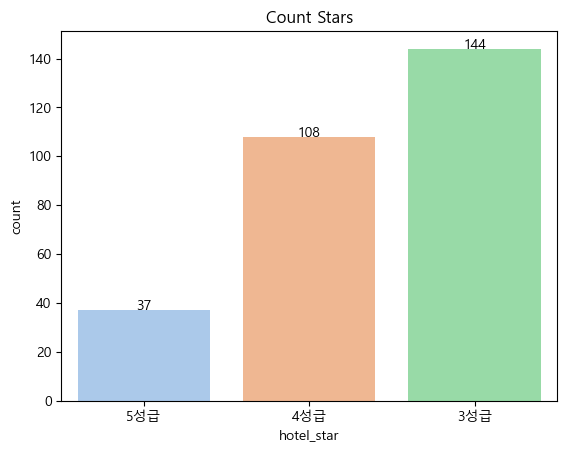

In [270]:
sns.countplot(
    data = hotels,
    x = 'hotel_star',
    palette = 'pastel'
)
plt.title('Count Stars')
plt.text(0,37,37,ha='center')
plt.text(1,108,108,ha='center')
plt.text(2,144,144,ha='center')

Text(2, 8.154, '8.154')

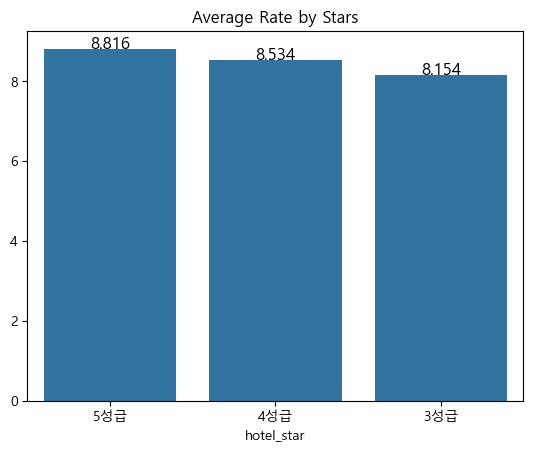

In [272]:
mean = hotels.groupby('hotel_star')['hotel_rate'].mean().sort_values(ascending=False)

sns.barplot(
    x = mean.index,
    y = mean.values
)
plt.title('Average Rate by Stars')
plt.text(0,8.816,8.816,fontsize=12,ha='center')
plt.text(1,8.534,8.534,fontsize=12,ha='center')
plt.text(2,8.154,8.154,fontsize=12,ha='center')

<Axes: xlabel='hotel_star', ylabel='hotel_rate'>

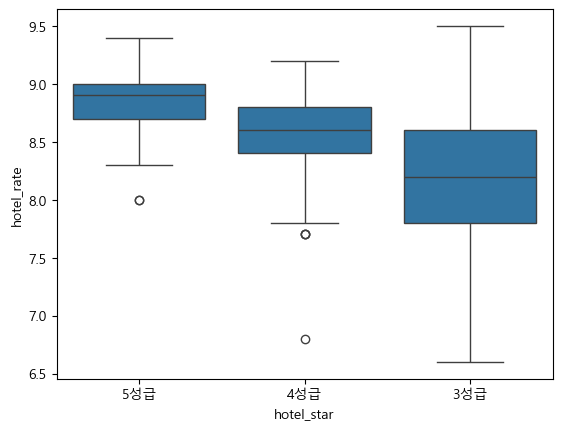

In [273]:
sns.boxplot(
    data = hotels,
    x = 'hotel_star',
    y = 'hotel_rate'
)

In [274]:
hotels['gu'] = hotels['hotel_location'].str.split(' ', expand=True)[1]


In [ ]:
hotels['gu'].value_counts()

Text(0.5, 1.0, 'Number by District')

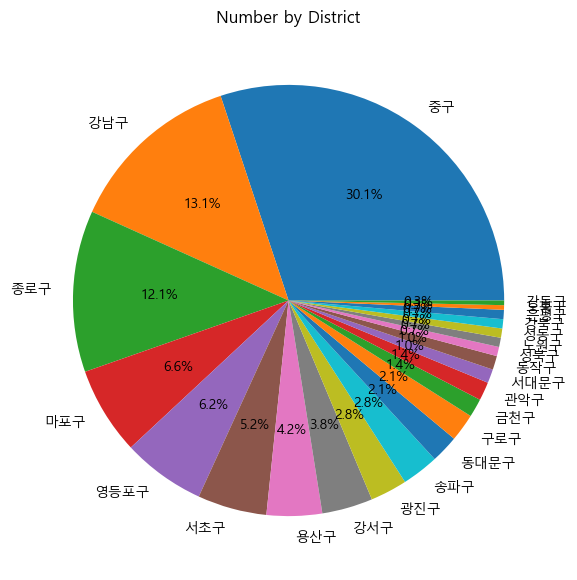

In [276]:
plt.figure(figsize=(7,7))
plt.pie(
    hotels['gu'].value_counts(),
    labels = hotels['gu'].value_counts().index,
    autopct='%1.1f%%'
    )
plt.title('Number by District')

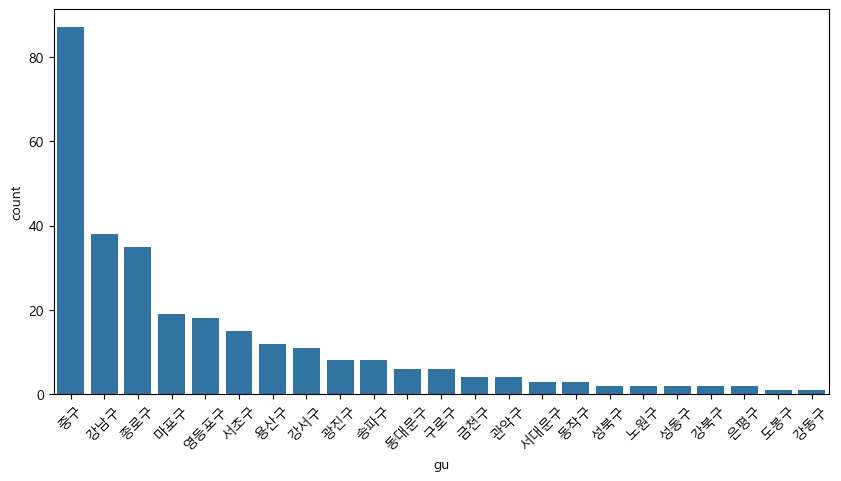

In [277]:
plt.figure(figsize=(10,5))
sns.barplot(
    hotels['gu'].value_counts()
    )
_=plt.xticks(rotation=45)

C:\Users\xzv22\AppData\Local\Temp\ipykernel_13616\63325564.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xzv22\AppData\Local\Temp\ipykernel_13616\63325564.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\xzv22\AppData\Local\Temp\ipykernel_13616\63325564.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, '3-Star Hotels')

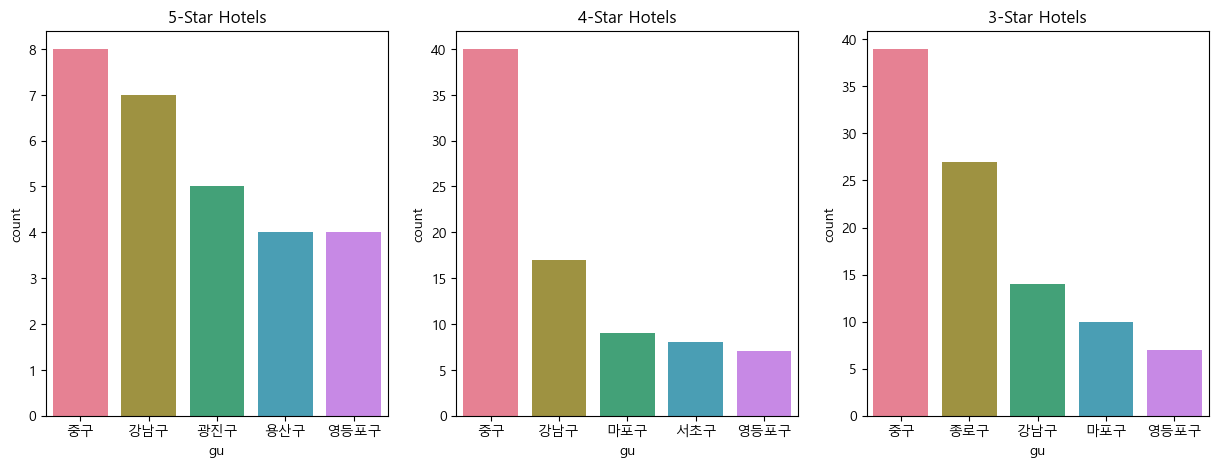

In [278]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(
    hotels[hotels['hotel_star'] == '5성급']['gu'].value_counts().head(5),
    palette = 'husl'
)
plt.title('5-Star Hotels')

plt.subplot(1,3,2)
sns.barplot(
    hotels[hotels['hotel_star'] == '4성급']['gu'].value_counts().head(5),
    palette = 'husl'
)
plt.title('4-Star Hotels')

plt.subplot(1,3,3)
sns.barplot(
    hotels[hotels['hotel_star'] == '3성급']['gu'].value_counts().head(5),
    palette = 'husl'
)
plt.title('3-Star Hotels')

In [279]:
hotels

,Unnamed: 0,hotel_name,hotel_star,hotel_rate,hotel_url,hotel_location,review,gu
0,0,그랜드 워커힐 서울 (Grand Walkerhill Seoul),5성급,8.8,https://www.agoda.com/ko-kr/grand-walkerhill-s...,서울특별시 광진구 워커힐로 177,"[['10.0', '오래된 곳이러는 인식이 강해 어릴 적 외에 성인이 된 후 스스로...",광진구
1,1,스위스 그랜드 호텔 서울 (Swiss Grand Hotel Seoul),5성급,8.0,https://www.agoda.com/ko-kr/grand-hilton-seoul...,서울 광진구 워커힐로 177,"[['10.0', '동생이랑 서울여행 와서 2박 3일 동안 호텔에 머문게 젤 기억에...",광진구
2,2,메이필드 호텔 서울 (Mayfield Hotel Seoul),5성급,8.6,https://www.agoda.com/ko-kr/mayfield-hotel/hot...,서울 서대문구 연희로 353,"[['10.0', '서울 어떤 호텔보다 직원분들이 친절합니다. 체크인부터 수영장이용...",서대문구
3,3,워커힐 더글라스 하우스 (성인 전용) (Walkerhill Douglas House...,5성급,9.1,https://www.agoda.com/ko-kr/walkerhill-douglas...,서울 강서구 방화대로 94,"[['10.0', '워커힐은 제가 6살때 난생처음 야외 수영장으로 방문했던 곳으로,...",강서구
4,4,롯데호텔 월드 (Lotte Hotel World),5성급,8.9,https://www.agoda.com/ko-kr/lotte-hotel-world/...,서울 광진구 워커힐로 177,"[['10.0', '지난 여름에 이어서 두번째 방문이었습니다. 롯데월드와 가깝다는 ...",광진구
...,...,...,...,...,...,...,...,...
291,143,새턴 호텔 (SATURN HOTEL),3성급,8.6,https://www.agoda.com/ko-kr/saturn-hotel/hotel...,서울 성동구 자동차시장1길 29,"[['10.0', '트윈베드 있는 방으로 예약했는데 무난하게 좋았어요 !']]",성동구
292,144,호텔 S 신촌 (Hotel S Shinchon),3성급,8.3,https://www.agoda.com/ko-kr/hotel-s-shinchon/h...,서울 마포구 서강로 128,"[['8.0', '최고네요 ㅎㅎㅎ'], ['6.4', '어두운 분위기라 아이랑 같이...",마포구
293,145,타오 호텔 (Hotel TAO),3성급,6.6,https://www.agoda.com/ko-kr/hotel-tao/hotel/se...,서울 은평구 통일로 863-24,"[['4.0', '해외있을때 예약했는데 투숙당일 연락와서는 싸게 팔고나서 싸게 팔았...",은평구
294,146,호텔 윈저 (Hotel Windsor),3성급,9.5,https://www.agoda.com/ko-kr/hotel-windsor/hote...,서울특별시 금천구 독산동 1008-10,"[['2.0', '너무 지저분ᆢ침대 바닥에 쓴 콘돔이 돌아다니고 있었음'], ['4...",금천구
